# Diffusion

In [8]:
#| hide
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *

Seed set to 42


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#| export
import torchvision.transforms.v2 as transforms
import torch

from nimrod.models.diffusion import DiffusorX
from nimrod.models.core import lr_finder, train_one_cycle
from nimrod.utils import get_device, set_seed
from nimrod.image.datasets import show_images

from omegaconf import OmegaConf

from hydra.utils import instantiate

device = get_device()
set_seed()

[21:58:59] INFO - Using device: cuda
Seed set to 42


## Data

In [11]:
BATCH_SIZE = 512

cfg = OmegaConf.load('../config/data/image/mnist.yaml')
tfs = transforms.Compose([transforms.ToTensor(), transforms.Resize(32), transforms.Normalize((0.5,), (0.5,))])  
dm = instantiate(cfg, batch_size=BATCH_SIZE, transforms=tfs, num_workers=20)
dm.prepare_data()
dm.setup()

[21:33:46] INFO - Init ImageDataModule for mnist
[21:33:48] INFO - loading dataset mnist with args () from split train
[21:33:48] INFO - loading dataset mnist from split train
Overwrite dataset info from restored data version if exists.
[21:33:50] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c
[21:33:50] INFO - Loading Dataset info from ../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c
Found cached dataset mnist (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c)
[21:33:50] INFO - Found cached dataset mnist (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c)
Loading Dataset info from /user/s/slegroux/Projects/nimrod/tutorials/../data/image/mnist/mnist/0.0.0/77f3279092a1c1579b2250db8eafed0ad422088c
[21:33:50] INFO - 

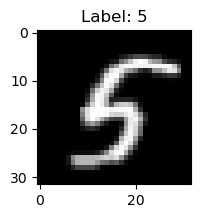

In [ ]:
dm.dim
dm.show(0)

## Training

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[21:59:18] INFO - Regressor: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
[21:59:18] INFO - DiffusionX: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[21:59:20] INFO - loading dataset mnist with args () from split train
[21:59:20] INFO - loading dataset mnist from split train
Overwrite dataset info from restored data version if exists.
[21:59:22] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/mni

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 97 steps due to diverging loss.
Learning rate set to 0.0001778279410038923
Restoring states from the checkpoint path at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_4f83ac50-6612-4061-8aff-a18c5e353c87.ckpt
Restored all states from the checkpoint at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_4f83ac50-6612-4061-8aff-a18c5e353c87.ckpt


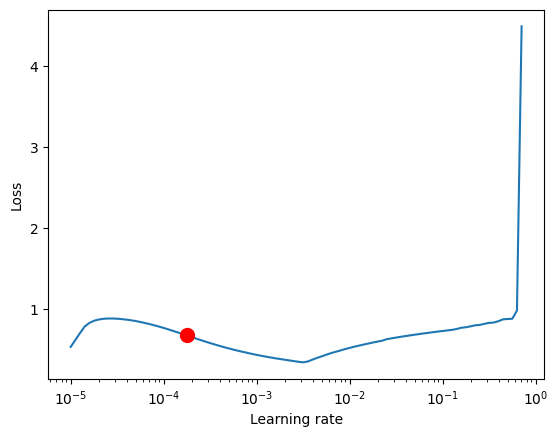

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[22:00:20] INFO - Regressor: init
[22:00:20] INFO - DiffusionX: init


Suggested learning rate: 0.0001778279410038923


/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/MNIST-Diffusion/DiffusorX-bs:512-epochs:5 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[22:00:21] INFO - Regressor: configure_optimizers
[22:00:21] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[22:00:21] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | nnet         | UNet2DModel      | 62.2 M | train
1 | criterion    | MSELoss          | 0      | train
2 | train_mse    | MeanSquaredError | 0      | train
3 | val_mse      | MeanSquaredError | 0      | train
4 | test_mse     | MeanSquaredError | 0      | train
5 | val_mse_best | MinMetric        | 0      | train
6 | train_loss   | MeanMetric       | 0      | train
7 | val_loss     | Me

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/loss         │   0.030081644654273987    │
└───────────────────────────┴───────────────────────────┘

[22:04:57] INFO - Best ckpt path: /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/MNIST-Diffusion/DiffusorX-bs:512-epochs:5/4-0.03-v3.ckpt


epoch,▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆█████████
lr-AdamW,▁▁▂▃▄▅▅▆▆▇███████▇▇▇▆▆▆▅▅▅▄▃▃▃▂▂▁▁▁▁▁▁▁▁
test/loss,▁
train/loss_epoch,█▁▁▁▁
train/loss_step,█▇▇▇▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇██
val/loss,█▂▁▁▁
val/mse_best,█▄▃▂▁
epoch,5
lr-AdamW,0.0
test/loss,0.03008


In [27]:
# SETUP
project_name = "MNIST-Diffusion"
torch.set_float32_matmul_precision("medium")

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'
precision = "16-mixed" # 16-mixed, 32-true

block_out_channels = [32, 128, 256, 512]  # channel/feature expansion


cfg = OmegaConf.load('../config/model/image/diffusorx.yaml')
cfg.nnet.block_out_channels = block_out_channels  # channel/feature expansion
model = instantiate(cfg) #partial

tags = [
    f"precision:{precision}",
    f"block_chan:{block_out_channels}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}"
    ]

# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 3e-4

# ONE-CYCLE TRAINING
trained_model, best_ckpt_path = train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    model_summary=False,
    logger_cb=exp_logger,
    precision=precision
    )

In [28]:

# mdl = DiffusorX.load_from_checkpoint(best_ckpt_path).eval().to(device)
mdl = trained_model.eval().to(device)
imgs = mdl.generate_images((32, 1, 32, 32))


Seed set to 42
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
Seed set to 42
[22:05:32] INFO - diffuse a batch


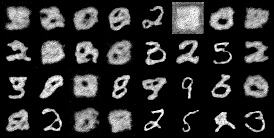

In [29]:
show_images(imgs, ncols=8)